# World Data Visualization Prize

Team submission for the World Data Visualization Prize competition put on by the World Government Summit

In [147]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.colors as color
import matplotlib.lines as mlines

### Initial exploration

In [148]:
ten_year_df = pd.read_csv('./data/World Dataviz Prize 2023 - What Just Happened_pivot.csv')

In [149]:
# compute percent of NA values
ten_year_df['value'].isna().sum()/len(ten_year_df['value']) # 16% NA

0.16251354279523295

In [150]:
ten_year_df.head(3)

,topic,data,year,value,metric,ten_year_change
0,Tropical Diseases,global deaths,2009,2051672.0,NaN,NaN
1,Tropical Diseases,global deaths,2010,2016434.0,NaN,NaN
2,Tropical Diseases,global deaths,2011,1960756.0,NaN,NaN


In [151]:
# merge topic and data for plotting
ten_year_df_merged = ten_year_df.copy()
ten_year_df_merged['topic'] = ten_year_df_merged['topic'] + '_' + ten_year_df_merged['data']
ten_year_df_merged = ten_year_df_merged.drop('data', axis=1)

In [152]:
# good reference here: https://seaborn.pydata.org/tutorial/axis_grids.html

# error:

# g = sns.FacetGrid(ten_year_df_merged, col='topic', sharey=False, col_wrap=6, height=4)
# g.map(sns.lineplot, 'year', 'value')
# g.set_titles(col_template = '{col_name}')

In [153]:
# another way to do that ^
# sns.relplot(data=ten_year_df, x='year', y='value', col='topic', kind='line')

### Energy Mix

In [229]:
energy_full = pd.read_csv('./data/WhatJustHappened_Energy_20230115.csv').rename(columns={'Unnamed: 0': 'year'})
energy = energy_full.set_index(energy_full['year'])
energy = energy[((energy.index <= 2020) & (energy.index >= 2010))].drop('year', axis=1)

energy.head(3)

,renew_share,renew_pri,renew_cap,wind_share,wind_prod,wind_pri,solar_share,solar_pri,solar_pc_cap,solar_pc_install,renew_invest,nuclear_share,gas_share,oil_share,coal_share,global_co2_emissions,global_methane_emissions
year,,,,,,,,,,,,,,,,,
2010,19.4,8.81,102.0,1.61,346,0.68,0.16,0.07,"40,338",4808.0,271.0,12.8,22.7,4.4,40.0,3.34,7.91
2011,19.8,8.99,110.0,1.98,440,0.84,0.29,0.13,"72,216",4104.0,323.0,11.9,22.2,4.7,40.8,3.45,8.05
2012,20.6,9.42,118.0,2.32,530,0.99,0.45,0.19,"101,745",3124.0,290.0,10.8,23.0,5.0,39.9,3.50,8.14


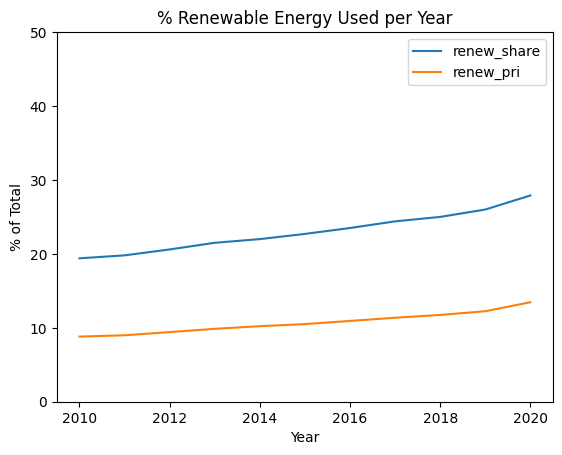

In [155]:
plt.plot(energy['renew_share'])
plt.plot(energy['renew_pri'])
plt.title('% Renewable Energy Used per Year')
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.ylim((0, 50))

plt.legend(['renew_share', 'renew_pri'])
plt.show()

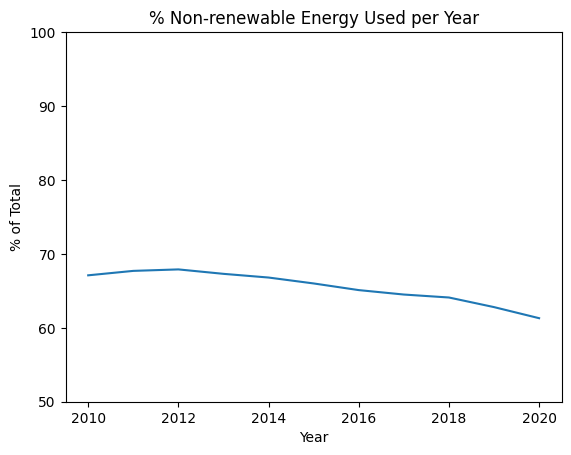

In [156]:
energy['nonrenew_share'] = energy['gas_share'] + energy['oil_share'] + energy['coal_share']
plt.plot(energy['nonrenew_share'])
plt.title('% Non-renewable Energy Used per Year')
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.ylim((50, 100))
plt.show()

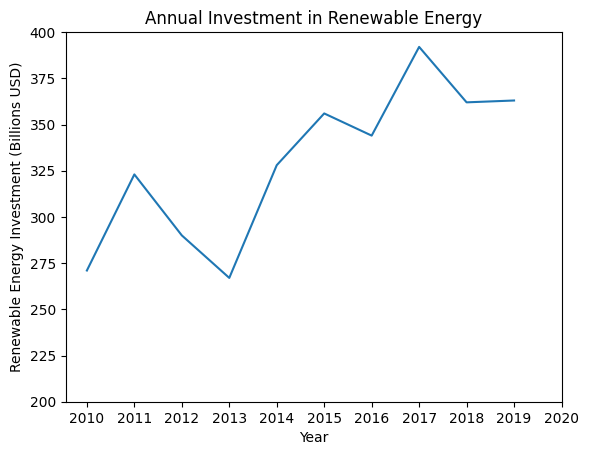

In [157]:
plt.plot(energy['renew_invest'])
plt.title('Annual Investment in Renewable Energy')
plt.ylabel('Renewable Energy Investment (Billions USD)')
plt.xlabel('Year')
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylim((200, 400))
plt.show()

### Plotting Countries

In [158]:
expend = pd.read_csv('data/Environmental_Protection_Expenditures.csv')
expend.head(3)

,ObjectId,Country,ISO2,ISO3,Indicator,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Unit,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on biodiversity & landscape protec...,"International Monetary Fund (IMF), Statistics ...",GENB_G14,Expenditure on Biodiversity & Landscape Protec...,"Government and Public Sector Finance, Expendit...",Domestic Currency,...,NaN,NaN,NaN,NaN,1.243785e+08,1.258269e+09,NaN,NaN,NaN,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on biodiversity & landscape protec...,"International Monetary Fund (IMF), Statistics ...",GENB_G14,Expenditure on Biodiversity & Landscape Protec...,"Government and Public Sector Finance, Expendit...",Percent of GDP,...,NaN,NaN,NaN,NaN,9.433491e-03,9.134202e-02,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,Expenditure on environment protection,"International Monetary Fund (IMF), Statistics ...",GEN_G14,Environmental Protection Expenditures,"Government and Public Sector Finance, Expendit...",Domestic Currency,...,2.846995e+09,3.344665e+09,2.204964e+09,1.122601e+09,1.702933e+09,2.377937e+09,NaN,NaN,NaN,NaN


In [159]:
expend[expend['ISO3'] == 'USA']

,ObjectId,Country,ISO2,ISO3,Indicator,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Unit,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021


In [160]:
expend = expend[expend['Unit'] == 'Percent of GDP'].fillna(int(0))

In [161]:
expend = expend[['Country', 'ISO3', 'F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020']]
expend = expend.groupby(['Country']).agg('sum')
expend

,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
Country,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",0.113937,0.365817,0.275447,0.299479,0.186381,0.091524,0.258318,0.345245,0.000000,0.000000,0.000000
Albania,0.011132,0.108505,0.070778,0.092511,0.131396,0.192885,0.370643,0.368472,0.173083,0.372185,0.658913
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.357306,0.310022,0.450567,0.372128,0.517609,0.305968,0.023040,0.260769,0.034129,0.017972,0.000000
Argentina,0.000000,0.000000,0.000000,0.000000,0.056765,0.035746,0.066823,0.106584,0.124123,0.137163,0.116308
...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,0.000000,0.000000,0.000000,0.000000,0.000000,0.040551,0.039078,0.037757,0.037185,0.037900,0.000000
"Uzbekistan, Rep. of",0.000000,0.007804,0.009911,0.014284,0.013943,0.012311,0.011282,0.032574,0.050005,0.044982,0.040205
West Bank and Gaza,0.000000,0.000000,0.000000,0.000000,0.000000,0.006143,0.006293,0.006955,0.013925,0.006386,0.008113


In [162]:
usa = pd.read_csv('./data/USAData_RenewableInvestment_2010-2020.csv').set_index('Country')
expend = pd.concat([expend, usa])
expend

,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
Country,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",0.113937,0.365817,0.275447,0.299479,0.186381,0.091524,0.258318,0.345245,0.000000,0.000000,0.000000
Albania,0.011132,0.108505,0.070778,0.092511,0.131396,0.192885,0.370643,0.368472,0.173083,0.372185,0.658913
Algeria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.357306,0.310022,0.450567,0.372128,0.517609,0.305968,0.023040,0.260769,0.034129,0.017972,0.000000
Argentina,0.000000,0.000000,0.000000,0.000000,0.056765,0.035746,0.066823,0.106584,0.124123,0.137163,0.116308
...,...,...,...,...,...,...,...,...,...,...,...
"Uzbekistan, Rep. of",0.000000,0.007804,0.009911,0.014284,0.013943,0.012311,0.011282,0.032574,0.050005,0.044982,0.040205
West Bank and Gaza,0.000000,0.000000,0.000000,0.000000,0.000000,0.006143,0.006293,0.006955,0.013925,0.006386,0.008113
"Yemen, Rep. of",0.403768,0.176478,0.193329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [163]:
explore = expend
rel = ['China', 'United States', 'Germany', 'Japan', 'Russia', 'Saudi Arabia', 'United Arab Emirates', 'United Kingdom', 'India', 'Italy', 'Spain', 'France', 'Netherlands, The', 'Canada', 'Belgium', 'Mexico', 'Denmark', 'Chile', 'Indonesia']
explore = explore.loc[explore.index.isin(rel)]

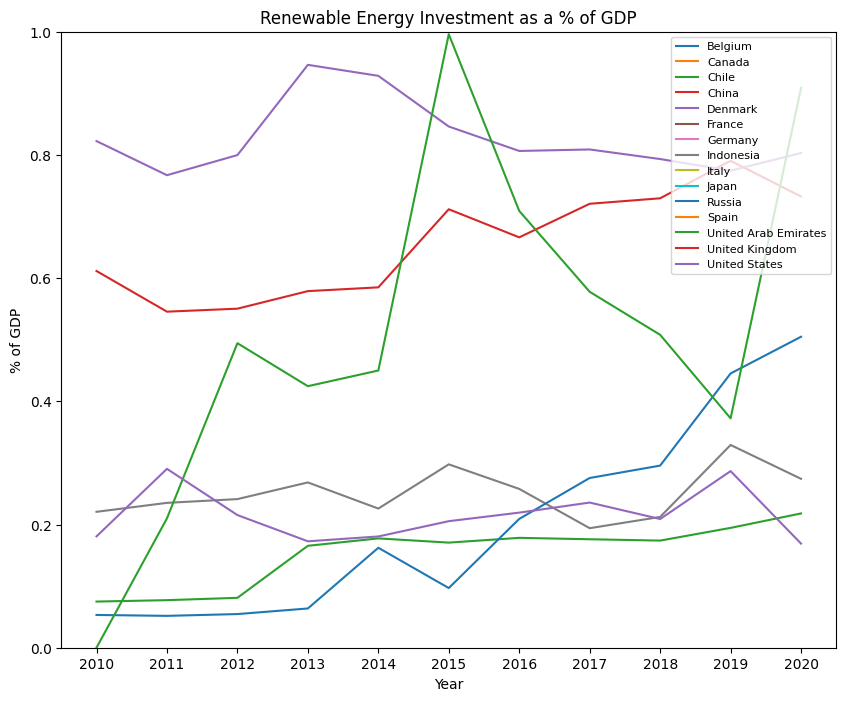

In [164]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(explore.T)
plt.legend(explore.T.columns, loc='upper right', fontsize=8)
plt.title('Renewable Energy Investment as a % of GDP')
plt.xlabel('Year')
plt.xticks(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylabel('% of GDP')
plt.ylim((0, 1))
plt.show()

In [165]:
renew_invest_avg = explore
renew_invest_avg['renew_invest_avg'] = (renew_invest_avg['F2010'] + renew_invest_avg['F2011'] + renew_invest_avg['F2012'] + renew_invest_avg['F2013'] + renew_invest_avg['F2014'] + renew_invest_avg['F2015'] + renew_invest_avg['F2016'] + renew_invest_avg['F2017'] + renew_invest_avg['F2018'] + renew_invest_avg['F2019'] + renew_invest_avg['F2020']) / 11
renew_invest_avg = renew_invest_avg.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
renew_invest_avg

C:\Users\simon\AppData\Local\Temp\ipykernel_19484\2985866311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renew_invest_avg['renew_invest_avg'] = (renew_invest_avg['F2010'] + renew_invest_avg['F2011'] + renew_invest_avg['F2012'] + renew_invest_avg['F2013'] + renew_invest_avg['F2014'] + renew_invest_avg['F2015'] + renew_invest_avg['F2016'] + renew_invest_avg['F2017'] + renew_invest_avg['F2018'] + renew_invest_avg['F2019'] + renew_invest_avg['F2020']) / 11


,renew_invest_avg
Country,
Belgium,2.726771
Canada,1.363102
Chile,0.153419
China,0.656603
Denmark,0.826918
France,1.986604
Germany,1.161476
Indonesia,0.250591
Italy,1.777062


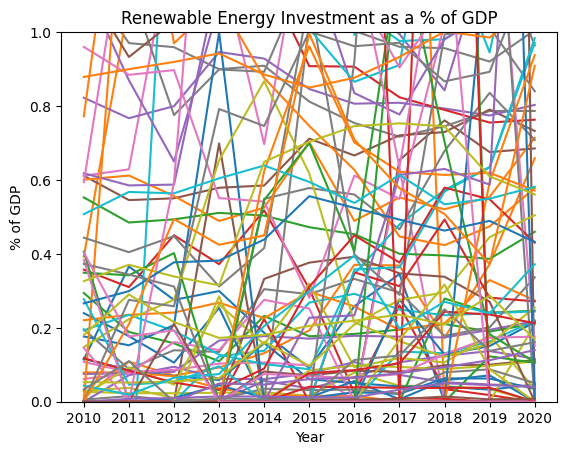

In [166]:
plt.plot(expend.T)
# plt.legend(expend.T.columns)
plt.title('Renewable Energy Investment as a % of GDP')
plt.xlabel('Year')
plt.xticks(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
plt.ylabel('% of GDP')
plt.ylim((0, 1))
plt.show()

### Primary Energy Share

In [167]:
primary = pd.read_csv('./data/renewable-share-energy-clean.csv').set_index('Entity')

In [168]:
rel = ['China', 'United States', 'Germany', 'Japan', 'Russia', 'Saudi Arabia', 'United Arab Emirates', 'United Kingdom', 'India', 'Italy', 'Spain', 'France', 'Netherlands, The', 'Canada', 'Belgium', 'Mexico', 'Denmark', 'Chile', 'Indonesia']
primary = primary.loc[primary.index.isin(rel)]
primary = primary[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
primary

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Entity,,,,,,,,,,,
Belgium,3.099551,4.045991,5.060075,5.382620,6.051173,6.661416,6.357454,6.910616,7.415190,7.959382,10.637791
Canada,27.789688,28.626370,28.976913,28.941828,28.147760,28.764147,29.652600,29.673640,28.814518,28.586376,30.542150
Chile,19.264341,17.502325,18.095960,18.432415,20.193163,21.427673,19.706335,22.405031,24.343296,24.144995,26.557531
China,7.615998,7.084204,8.522597,8.959421,10.197330,10.787498,11.530947,12.138821,12.807393,13.515960,14.242872
Denmark,15.651074,18.646690,20.934052,21.378275,24.633705,26.659948,25.713480,30.301117,29.154387,32.795660,37.272453
France,8.220292,7.185518,9.137363,10.459435,10.459279,10.147399,10.975246,10.437264,12.132495,12.384905,14.788747
Germany,8.792469,10.566965,11.899699,12.063335,13.278847,14.823544,14.607312,16.196213,17.084951,18.768305,21.122828
India,6.583671,7.501343,6.727289,7.329665,7.344336,7.184646,7.011397,7.511875,7.912806,8.849619,9.730037
Indonesia,4.326221,3.388598,3.471363,4.330604,4.478632,3.792957,5.479020,5.283774,7.393458,7.870309,9.860147


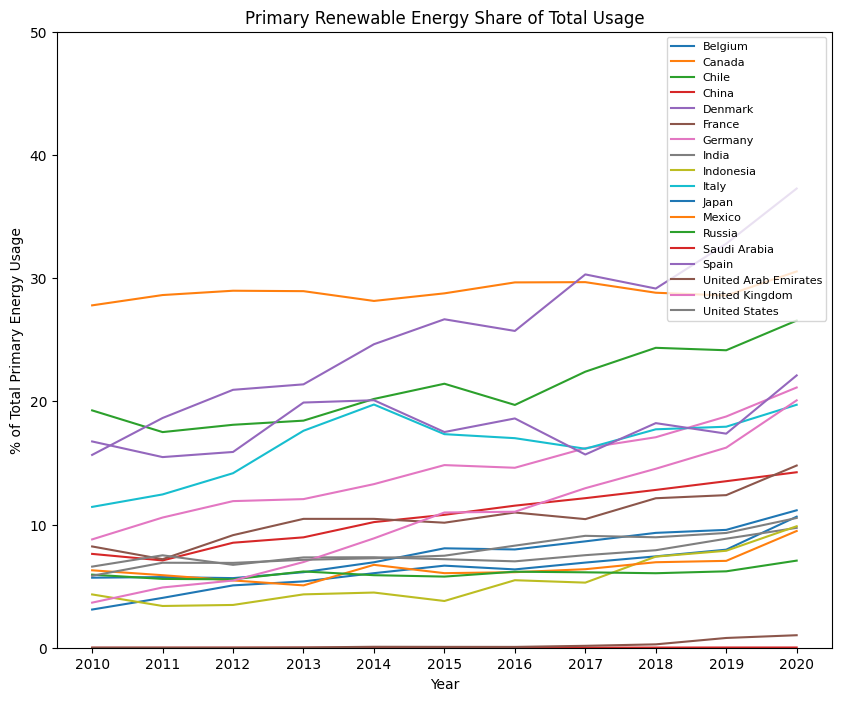

In [169]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(primary.T)
plt.legend(primary.T.columns, loc='upper right', fontsize=8)
plt.title('Primary Renewable Energy Share of Total Usage')
plt.xlabel('Year')
plt.ylabel('% of Total Primary Energy Usage')
plt.ylim((0, 50))
plt.show()

In [170]:
primary_avg = primary
primary_avg['primary_avg'] = (primary_avg['2010'] + primary_avg['2011'] + primary_avg['2012'] + primary_avg['2013'] + primary_avg['2014'] + primary_avg['2015'] + primary_avg['2016'] + primary_avg['2017'] + primary_avg['2018'] + primary_avg['2019'] + primary_avg['2020']) / 11
primary_avg = primary_avg.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], axis=1)
primary_avg

,primary_avg
Entity,
Belgium,6.325569
Canada,28.955999
Chile,21.097551
China,10.673004
Denmark,25.740076
France,10.575268
Germany,14.473133
India,7.607880
Indonesia,5.425008


### Quantifying Non-renewable Energy Stressors (pollution, warming, etc.)

In [171]:
temp_delta = pd.read_csv('./data/Annual_Surface_Temperature_Change.csv').set_index('Country')
temp_delta.head(3)

,ObjectId,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,...,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",1,AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.105,...,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544,1.421
Albania,2,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,...,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623,1.682
Algeria,3,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.162,...,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913,2.317


In [172]:
temp_delta = temp_delta[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020']]
temp_delta.head()

,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020
Country,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.580,0.960,0.544
Albania,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823,1.623
Algeria,2.249,1.390,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094,1.913
American Samoa,1.047,0.642,0.646,0.883,0.554,0.394,0.924,0.820,0.574,0.924,0.815
"Andorra, Principality of",0.411,1.617,1.196,0.757,1.857,1.546,1.830,1.771,1.761,1.813,2.401


In [173]:
rel = ['China', 'United States', 'Germany', 'Japan', 'Russia', 'Saudi Arabia', 'United Arab Emirates', 'United Kingdom', 'India', 'Italy', 'Spain', 'France', 'Netherlands', 'Canada', 'Belgium', 'Mexico', 'Denmark', 'Chile', 'Indonesia']
temp_delta = temp_delta.loc[temp_delta.index.isin(rel)]

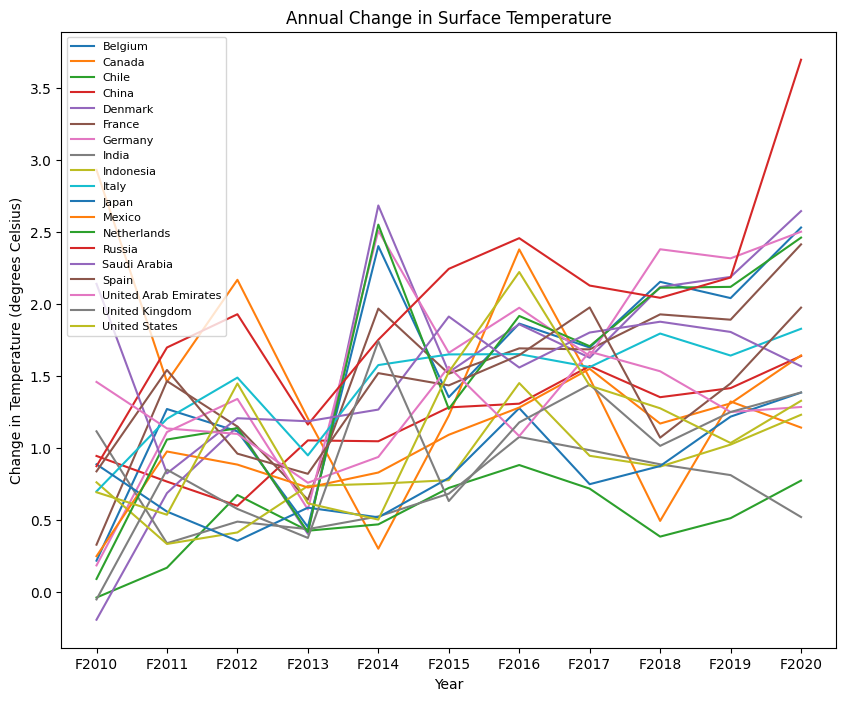

In [174]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.plot(temp_delta.T)
plt.legend(temp_delta.T.columns, loc='best', fontsize=8)
plt.title('Annual Change in Surface Temperature')
plt.xlabel('Year')
plt.ylabel('Change in Temperature (degrees Celsius)')
plt.show()

In [175]:
temp_delta_avg = temp_delta
temp_delta_avg['temp_delta_avg'] = (temp_delta_avg['F2010'] + temp_delta_avg['F2011'] + temp_delta_avg['F2012'] + temp_delta_avg['F2013'] + temp_delta_avg['F2014'] + temp_delta_avg['F2015'] + temp_delta_avg['F2016'] + temp_delta_avg['F2017'] + temp_delta_avg['F2018'] + temp_delta_avg['F2019'] + temp_delta_avg['F2020']) / 11
temp_delta_avg = temp_delta_avg.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
temp_delta_avg

,temp_delta_avg
Country,
Belgium,1.551545
Canada,1.461818
Chile,0.514818
China,1.176818
Denmark,1.514636
France,1.513182
Germany,1.650909
India,0.712545
Indonesia,0.842364


### Initial Bubble Plot

In [176]:
invest_vs_impact = pd.merge(temp_delta_avg, renew_invest_avg, left_on=temp_delta_avg.index, right_on=renew_invest_avg.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact = pd.merge(invest_vs_impact, primary_avg, left_on=invest_vs_impact.index, right_on=primary_avg.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact['primary_avg_scale'] = invest_vs_impact['primary_avg'] ** 4
invest_vs_impact

,temp_delta_avg,renew_invest_avg,primary_avg,primary_avg_scale
Country,,,,
Belgium,1.551545,2.726771,6.325569,1601.026101
Canada,1.461818,1.363102,28.955999,702998.206894
Chile,0.514818,0.153419,21.097551,198119.950831
China,1.176818,0.656603,10.673004,12976.173520
Denmark,1.514636,0.826918,25.740076,438974.537705
France,1.513182,1.986604,10.575268,12507.354127
Germany,1.650909,1.161476,14.473133,43878.347852
Indonesia,0.842364,0.250591,5.425008,866.166513
Italy,1.455636,1.777062,16.479306,73748.926191


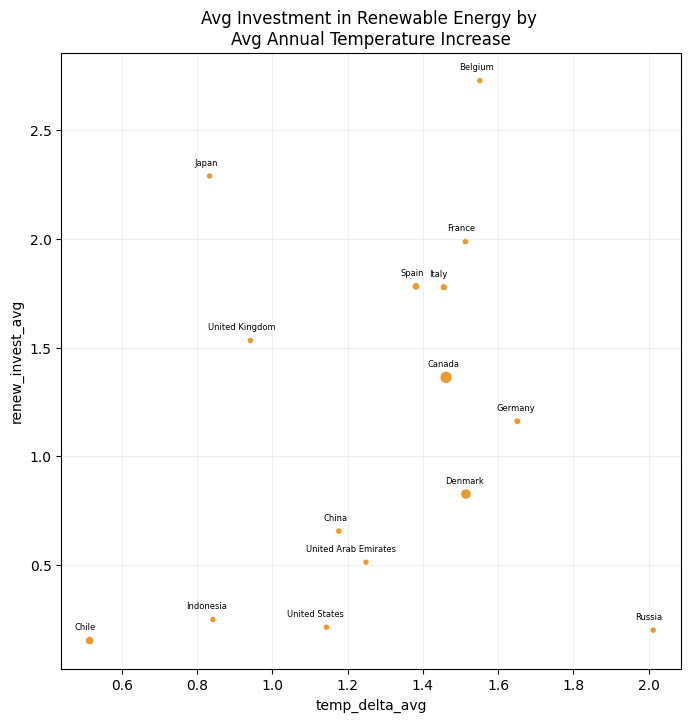

In [177]:
fig, ax = plt.subplots(1, figsize=(8, 8))
sns.scatterplot(data=invest_vs_impact, x='temp_delta_avg', y='renew_invest_avg', size='primary_avg_scale', legend=False, color='#eb982d')
plt.title('Avg Investment in Renewable Energy by \nAvg Annual Temperature Increase')
plt.grid(alpha=0.18)

for i, txt in enumerate(invest_vs_impact.index):
    plt.annotate(txt, (invest_vs_impact['temp_delta_avg'][i] - (0.008 * len(txt)), invest_vs_impact['renew_invest_avg'][i] + 0.05), fontsize=6)

plt.show()

In [178]:
gdp_per_capita = pd.read_csv('./data/country_gdp_per_capita_worldbank.csv')
gdp_per_capita.head(3)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560,29342.100860
1,Africa Eastern and Southern,AFE,162.907576,162.546236,171.996697,199.182564,179.381788,198.223726,209.407648,211.699966,...,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160,1537.336021
2,Afghanistan,AFG,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,...,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552,368.754614


In [179]:
gdp_per_capita = gdp_per_capita[['Country Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']]
gdp_per_capita.head(3)

,Country Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,24452.928360,26044.435930,25609.955720,26515.678080,26942.307980,28421.386490,28451.273740,29326.708060,30220.594520,31650.760540,24487.863560
1,Africa Eastern and Southern,1643.550495,1792.847428,1760.216229,1731.795976,1719.809190,1540.850354,1432.111827,1613.788555,1550.180567,1500.229274,1353.769160
2,Afghanistan,554.595200,621.912311,663.141053,651.987862,628.146804,592.476537,520.252064,530.149831,502.056771,500.522664,516.866552


In [180]:
gdp_per_capita_avg = gdp_per_capita.rename(columns={'Country Name': 'Country'})
gdp_per_capita_avg['gdp_per_capita_avg'] = (gdp_per_capita_avg['2010'] + gdp_per_capita_avg['2011'] + gdp_per_capita_avg['2012'] + gdp_per_capita_avg['2013'] + gdp_per_capita_avg['2014'] + gdp_per_capita_avg['2015'] + gdp_per_capita_avg['2016'] + gdp_per_capita_avg['2017'] + gdp_per_capita_avg['2018'] + gdp_per_capita_avg['2019'] + gdp_per_capita_avg['2020']) / 11
gdp_per_capita_avg = gdp_per_capita_avg.drop(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], axis=1)
gdp_per_capita_avg = gdp_per_capita_avg.set_index('Country')

gdp_per_capita_avg.to_csv('test_gdp_tocscl')
gdp_per_capita_avg.head(3)

,gdp_per_capita_avg
Country,
Aruba,27465.808453
Africa Eastern and Southern,1603.559005
Afghanistan,571.100695


In [181]:
temp_delta2 = pd.read_csv('./data/Annual_Surface_Temperature_Change.csv').set_index('Country')
temp_delta2 = temp_delta2[['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020']]

temp_delta_avg2 = temp_delta2
temp_delta_avg2['temp_delta_avg'] = (temp_delta_avg2['F2010'] + temp_delta_avg2['F2011'] + temp_delta_avg2['F2012'] + temp_delta_avg2['F2013'] + temp_delta_avg2['F2014'] + temp_delta_avg2['F2015'] + temp_delta_avg2['F2016'] + temp_delta_avg2['F2017'] + temp_delta_avg2['F2018'] + temp_delta_avg2['F2019'] + temp_delta_avg2['F2020']) / 11
temp_delta_avg2 = temp_delta_avg2.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
temp_delta_avg2['temp_delta_avg'] = temp_delta_avg2['temp_delta_avg'] + .25
temp_delta_avg2.head(5)

,temp_delta_avg
Country,
"Afghanistan, Islamic Rep. of",1.381909
Albania,1.781182
Algeria,1.719909
American Samoa,0.997545
"Andorra, Principality of",1.791818


In [182]:
renew_invest_avg2 = expend
renew_invest_avg2['renew_invest_avg'] = (renew_invest_avg2['F2010'] + renew_invest_avg2['F2011'] + renew_invest_avg2['F2012'] + renew_invest_avg2['F2013'] + renew_invest_avg2['F2014'] + renew_invest_avg2['F2015'] + renew_invest_avg2['F2016'] + renew_invest_avg2['F2017'] + renew_invest_avg2['F2018'] + renew_invest_avg2['F2019'] + renew_invest_avg2['F2020']) / 11
renew_invest_avg2 = renew_invest_avg2.drop(['F2010', 'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019', 'F2020'], axis=1)
renew_invest_avg2.head(5)

,renew_invest_avg
Country,
"Afghanistan, Islamic Rep. of",0.176013
Albania,0.231864
Algeria,0.000000
Angola,0.240865
Argentina,0.058501


In [183]:
invest_vs_impact2 = pd.merge(temp_delta_avg2, renew_invest_avg2, left_on=temp_delta_avg2.index, right_on=renew_invest_avg2.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact2 = pd.merge(invest_vs_impact2, gdp_per_capita_avg, left_on=invest_vs_impact2.index, right_on=gdp_per_capita_avg.index).rename(columns={'key_0': 'Country'}).set_index('Country')
invest_vs_impact2.head(5)

,temp_delta_avg,renew_invest_avg,gdp_per_capita_avg
Country,,,
Albania,1.781182,0.231864,4581.339418
Algeria,1.719909,0.000000,4586.063210
Angola,1.520727,0.240865,3314.440736
Argentina,0.970273,0.058501,12107.286063
Australia,1.242636,1.670426,57985.388578


In [184]:
g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'Greece', 'Hungary', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
#invest_vs_impact2['g20'] = 
invest_vs_impact2['g20'] = invest_vs_impact2.index.isin(g20).tolist()
invest_vs_impact2.head(5)

,temp_delta_avg,renew_invest_avg,gdp_per_capita_avg,g20
Country,,,,
Albania,1.781182,0.231864,4581.339418,False
Algeria,1.719909,0.000000,4586.063210,False
Angola,1.520727,0.240865,3314.440736,False
Argentina,0.970273,0.058501,12107.286063,True
Australia,1.242636,1.670426,57985.388578,True


In [185]:
'''
light green for investment % > 2 & temp increase < 1.5 (top-left quadrant). G20 -> darker green

light blue for for investment % > 2 & temp increase > 1.5 (top-right quadrant). G20 -> darker blue

light orange for investment % < 2 & temp increase < 1.5 (bottom-left quadrant). G20 -> darker orange

light red for investment % < 2 & temp increase > 1.5 (bottom-right quadrant). G20 -> darker red
'''
# & (invest_vs_impact2.g20.where(invest_vs_impact2.g20, 'True'))

c1 = (invest_vs_impact2["g20"] == True)
c2 = (invest_vs_impact2['renew_invest_avg'] > 2)
c3 = (invest_vs_impact2['temp_delta_avg'] < 1.5)

invest_vs_impact2["invest_impact"] = np.where(c1 & c2 & c3, "darkgreen", "False")
invest_vs_impact2["invest_impact"] = np.where(c1 & c2 & ~c3, "darkorange", invest_vs_impact2["invest_impact"])
invest_vs_impact2["invest_impact"] = np.where(c1 & ~c2 & c3, "darkblue", invest_vs_impact2["invest_impact"])
invest_vs_impact2["invest_impact"] = np.where(c1 & ~c2 & ~c3, "darkred", invest_vs_impact2["invest_impact"])
invest_vs_impact2["invest_impact"] = np.where(~c1 & c2 & c3, "lightgreen", invest_vs_impact2["invest_impact"])
invest_vs_impact2["invest_impact"] = np.where(~c1 & c2 & ~c3, "lightorange", invest_vs_impact2["invest_impact"])
invest_vs_impact2["invest_impact"] = np.where(~c1 & ~c2 & c3, "lightblue", invest_vs_impact2["invest_impact"])
invest_vs_impact2["invest_impact"] = np.where(~c1 & ~c2 & ~c3, "lightred", invest_vs_impact2["invest_impact"])



In [186]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(invest_vs_impact2)

,temp_delta_avg,renew_invest_avg,gdp_per_capita_avg,g20,invest_impact
Country,,,,,
Albania,1.781182,0.231864,4581.339418,False,lightred
Algeria,1.719909,0.000000,4586.063210,False,lightred
Angola,1.520727,0.240865,3314.440736,False,lightred
Argentina,0.970273,0.058501,12107.286063,True,darkblue
Australia,1.242636,1.670426,57985.388578,True,darkblue
Austria,2.125909,0.862271,48791.564573,True,darkred
"Bahamas, The",1.274636,1.872258,28830.568047,False,lightblue
Bangladesh,0.983091,0.028472,1420.247229,False,lightblue
Belgium,1.801545,2.726771,45246.268777,True,darkorange


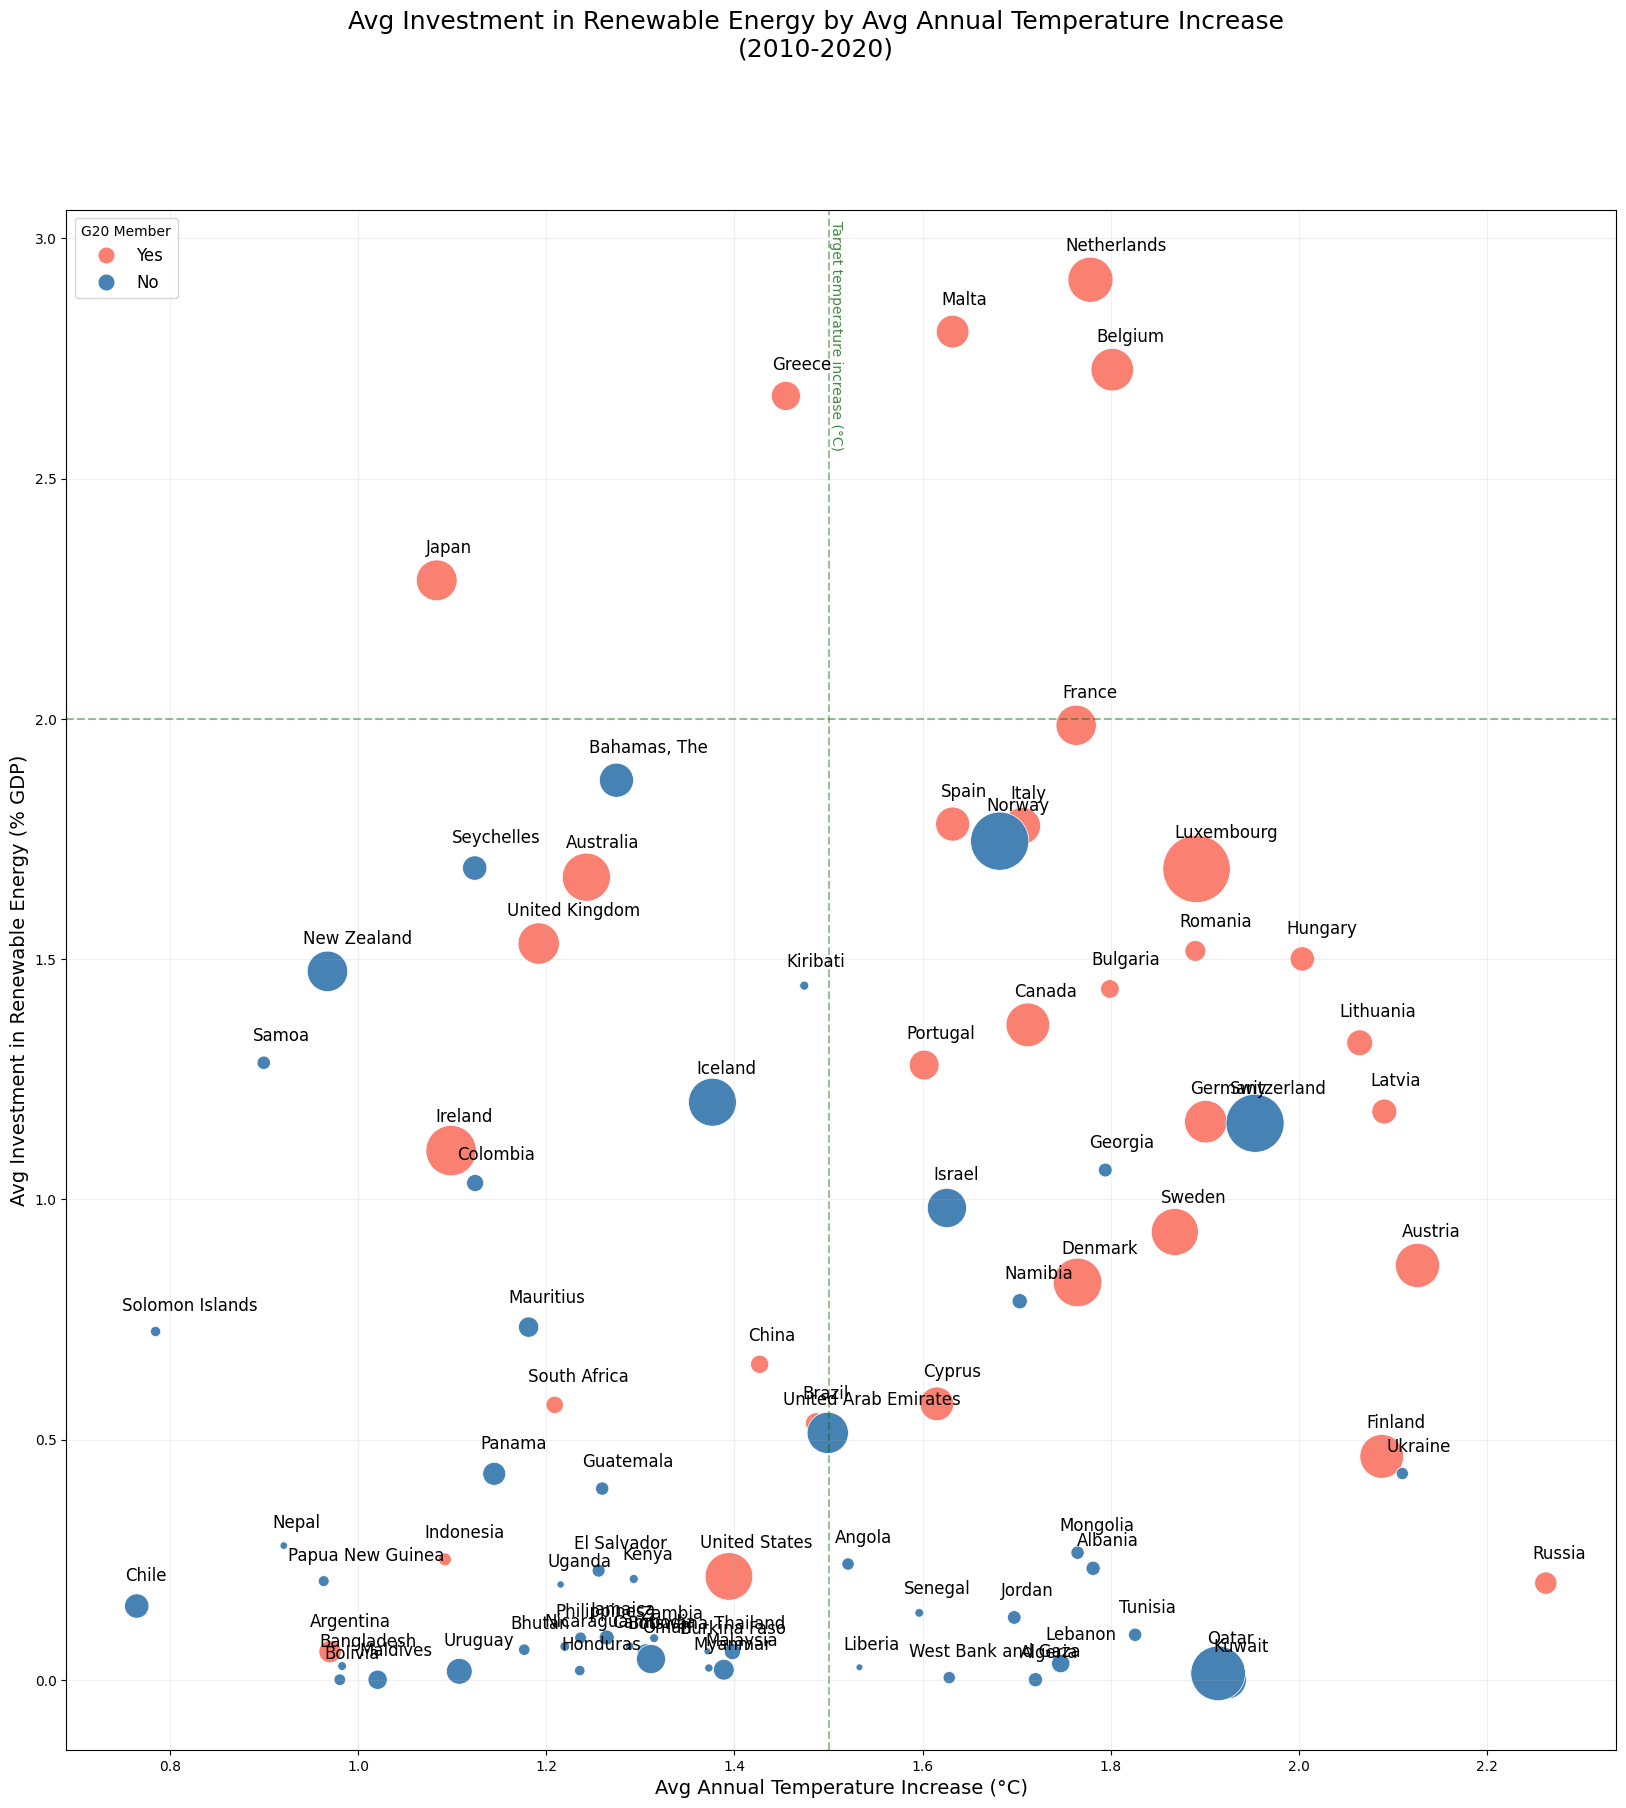

In [187]:
fig, ax = plt.subplots(1, figsize=(20, 20))
iiplot_data = invest_vs_impact2
iiplot_data['g20'] = iiplot_data['g20'].replace({True: 'Yes', False: 'No'})
iiplot = sns.scatterplot(data=iiplot_data, x='temp_delta_avg', y='renew_invest_avg', hue='g20', markers=True, legend = 'full', palette = sns.color_palette(palette=["Salmon", "SteelBlue"]), hue_order= ["Yes", "No"], size='gdp_per_capita_avg', sizes=((iiplot_data['gdp_per_capita_avg'].min() ** (1/2)), (iiplot_data['gdp_per_capita_avg'].max() ** (2/3))))
#iiplot.set(title = 'Avg Investment in Renewable Energy by Avg Annual Temperature Increase\n(2010-2020)',
#    xlabel=f'Avg Annual Temperature Increase ({chr(176)}C)',
#    ylabel='Avg Investment in Renewable Energy (% GDP)')

salmon_legend = mlines.Line2D([], [], color='Salmon', marker='o', linestyle='None', markersize=35)
steelblue_legend = mlines.Line2D([], [], color='SteelBlue', marker='o', linestyle='None', markersize=35)
plt.legend(handles=[salmon_legend, steelblue_legend], labels=['Yes', 'No'], loc='upper left', title='G20 Member', markerscale=0.3, fontsize=12)
# plt.rcParams['legend.title_fontsize'] = 'large'

plt.grid(alpha=0.18)

plt.axvline(x = 1.5, color = 'darkgreen', linestyle = '--', alpha=0.4)
plt.annotate(f'Target temperature increase ({chr(176)}C)', (1.501, 2.565), color = 'darkgreen', alpha=0.75, rotation=270)

plt.axhline(y = 2, color = 'darkgreen', linestyle = '--', alpha=0.4)
plt.annotate('Investment needed to fully transition to renewable energy by 2050', (0.4522, 2.01), color = 'darkgreen', alpha=0.75)

for i, txt in enumerate(invest_vs_impact2.index):
    plt.annotate(txt, (invest_vs_impact2['temp_delta_avg'][i] - (0.0024 * len(txt)), invest_vs_impact2['renew_invest_avg'][i] + (0.0055 * np.log(iiplot_data.iloc[i]['gdp_per_capita_avg']))), fontsize=12)

fig.suptitle('Avg Investment in Renewable Energy by Avg Annual Temperature Increase\n(2010-2020)', fontsize=18)
plt.xlabel(f'Avg Annual Temperature Increase ({chr(176)}C)', fontsize=14)
plt.ylabel('Avg Investment in Renewable Energy (% GDP)', fontsize=14)

plt.savefig('PosterSubmission_colorG20.svg', format='svg')
plt.show()

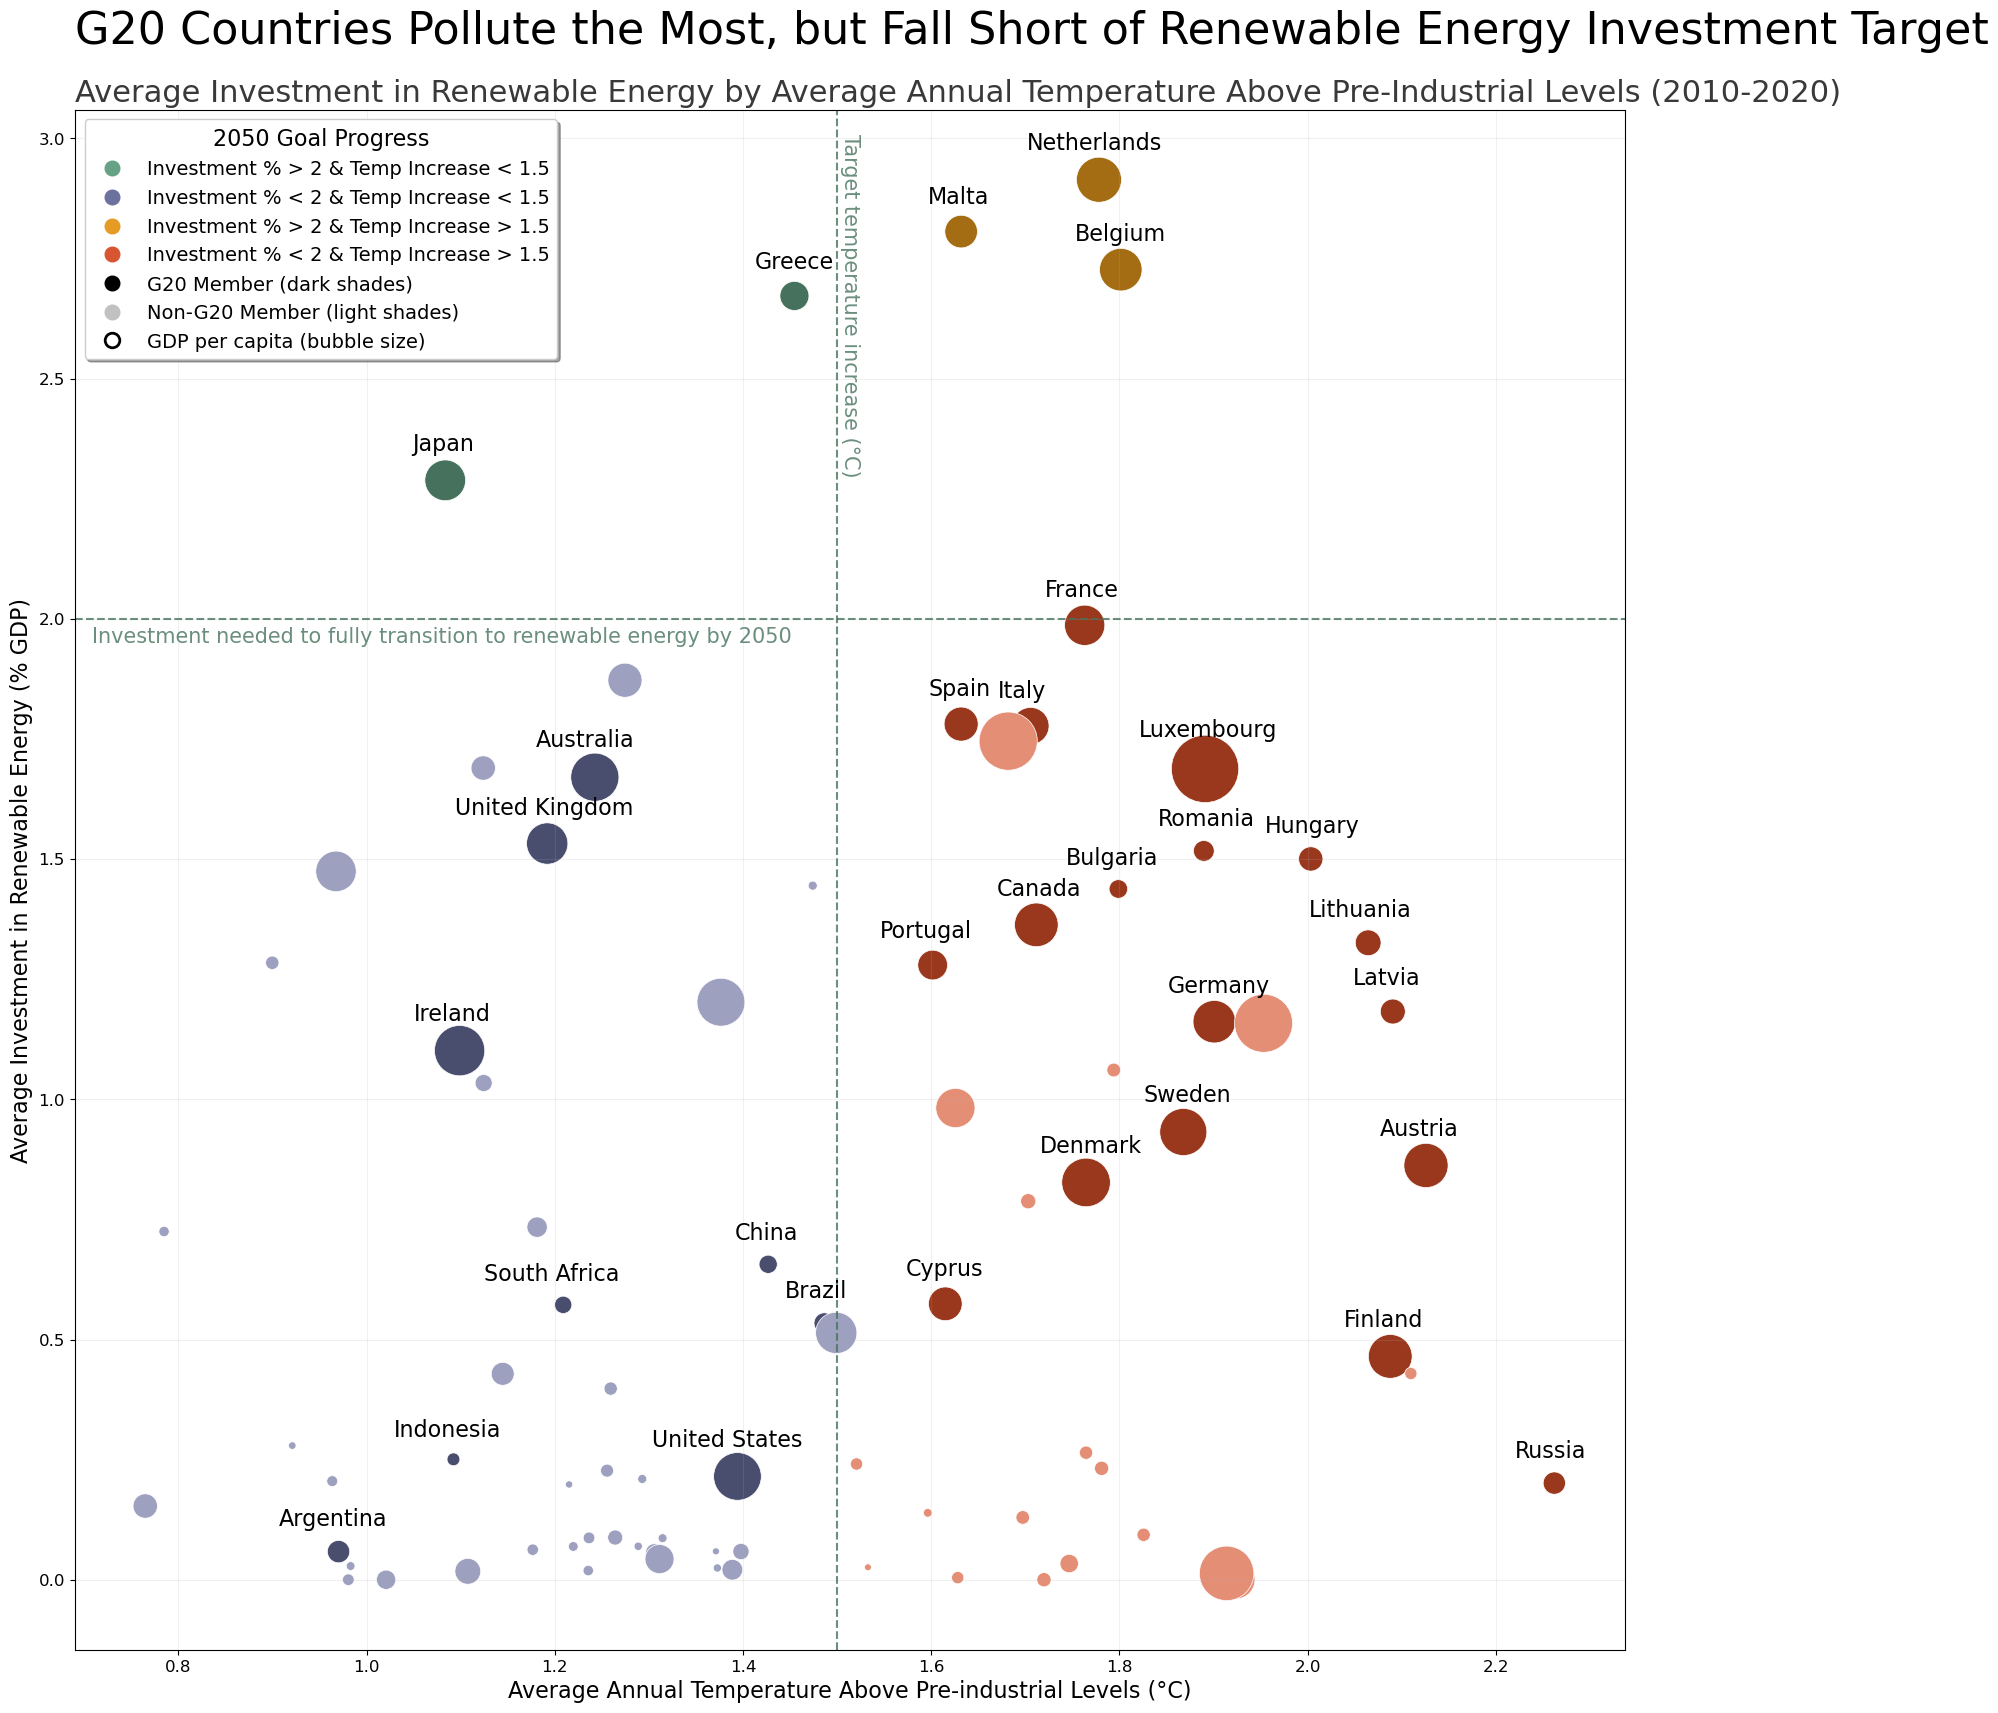

In [438]:
fig, ax = plt.subplots(1, figsize=(20, 20))
iiplot_data = invest_vs_impact2
iiplot_data['invest_impact'] = pd.Categorical(iiplot_data['invest_impact'], categories=['darkgreen', 'darkblue', 'darkorange', 'darkred', 'lightgreen', 'lightblue', 'lightorange', 'lightred'])
#iiplot_data['invest_impact'] = pd.Categorical(iiplot_data['invest_impact'], categories=['Dark Green', 'Dark Blue', 'Dark Orange', 'Dark Red', 'Light Green', 'Light Blue', 'Light Orange', 'Light Red'])
iiplot_data['g20'] = iiplot_data['g20'].replace({True: 'Yes', False: 'No'})

green_hex = '#67A286'
blue_hex = '#6C719D'
orange_hex = '#E59B24'
red_hex = '#D85531'
lightgreen_hex = '#9AC1AE'
lightblue_hex = '#9DA0BE'
lightorange_hex = '#EEBC6D'
lightred_hex = '#E58E76'
darkgreen_hex = '#46725D'
darkblue_hex = '#494D6E'
darkorange_hex = '#A46D13'
darkred_hex = '#9A381D'

sns.scatterplot(data=iiplot_data, x='temp_delta_avg', y='renew_invest_avg', hue='invest_impact', markers=True, legend = 'full', palette = dict(darkgreen = darkgreen_hex, darkblue = darkblue_hex, darkorange = darkorange_hex, darkred = darkred_hex, lightgreen = lightgreen_hex, lightblue = lightblue_hex, lightorange = lightorange_hex, lightred = lightred_hex), size='gdp_per_capita_avg', sizes=((iiplot_data['gdp_per_capita_avg'].min() ** (1/2)), (iiplot_data['gdp_per_capita_avg'].max() ** (2/3))))

'''
light green for investment % > 2 & temp increase < 1.5 (top-left quadrant). G20 -> darker green

light blue for for investment % > 2 & temp increase > 1.5 (top-right quadrant). G20 -> darker blue

light orange for investment % < 2 & temp increase < 1.5 (bottom-left quadrant). G20 -> darker orange

light red for investment % < 2 & temp increase > 1.5 (bottom-right quadrant). G20 -> darker red
'''

green_legend = mlines.Line2D([], [], color=green_hex, marker='o', linestyle='None', markersize=35)
blue_legend = mlines.Line2D([], [], color=blue_hex, marker='o', linestyle='None', markersize=35)
orange_legend = mlines.Line2D([], [], color=orange_hex, marker='o', linestyle='None', markersize=35)
red_legend = mlines.Line2D([], [], color=red_hex, marker='o', linestyle='None', markersize=35)
dark_legend = mlines.Line2D([], [], color='Black', marker='o', linestyle='None', markersize=35)
light_legend = mlines.Line2D([], [], color='#C1C1C2', marker='o', linestyle='None', markersize=35)
gdp_legend = mlines.Line2D([], [], color='White', marker='o', linestyle='None', markersize=35, markerfacecolor='None', markeredgecolor='Black', markeredgewidth=2)

labels = ['Investment % > 2 & Temp Increase < 1.5', 'Investment % < 2 & Temp Increase < 1.5', 'Investment % > 2 & Temp Increase > 1.5', 'Investment % < 2 & Temp Increase > 1.5', 'G20 Member (dark shades)', 'Non-G20 Member (light shades)', 'GDP per capita (bubble size)']
handles=[green_legend, blue_legend, orange_legend, red_legend, dark_legend, light_legend, gdp_legend]
plt.legend(handles = handles, labels = labels, loc='upper left', title='2050 Goal Progress', markerscale=0.3, fontsize=14, title_fontsize=16, frameon=True, fancybox=True, shadow=True)

plt.grid(alpha=0.18)

plt.axvline(x = 1.5, color = darkgreen_hex, linestyle = '--', alpha=0.8)
plt.annotate(f'Target temperature increase ({chr(176)}C)', (1.503, 2.302), color = darkgreen_hex, alpha=0.8, rotation=270, size=15)

plt.axhline(y = 2, color = darkgreen_hex, linestyle = '--', alpha=0.8)
plt.annotate('Investment needed to fully transition to renewable energy by 2050', (0.708, 1.95), color = darkgreen_hex, alpha=0.8, size=15)

for i, txt in enumerate(invest_vs_impact2.index):
    if invest_vs_impact2['g20'][i] == 'Yes':
        plt.annotate(txt, (invest_vs_impact2['temp_delta_avg'][i] - (0.007 * len(txt)), invest_vs_impact2['renew_invest_avg'][i] + (0.0057 * np.log(iiplot_data.iloc[i]['gdp_per_capita_avg']))), fontsize=16)
    else:
        continue

plt.suptitle('G20 Countries Pollute the Most, but Fall Short of Renewable Energy Investment Target', fontsize=32, y=0.93, x=0.125, ha='left')
plt.title('Average Investment in Renewable Energy by Average Annual Temperature Above Pre-Industrial Levels (2010-2020)', fontsize=22, loc= 'left', color = '#39393A')
plt.xlabel(f'Average Annual Temperature Above Pre-industrial Levels ({chr(176)}C)', fontsize=16)
plt.ylabel('Average Investment in Renewable Energy (% GDP)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('PosterSubmission_colorquad.svg', format='svg')
plt.show()

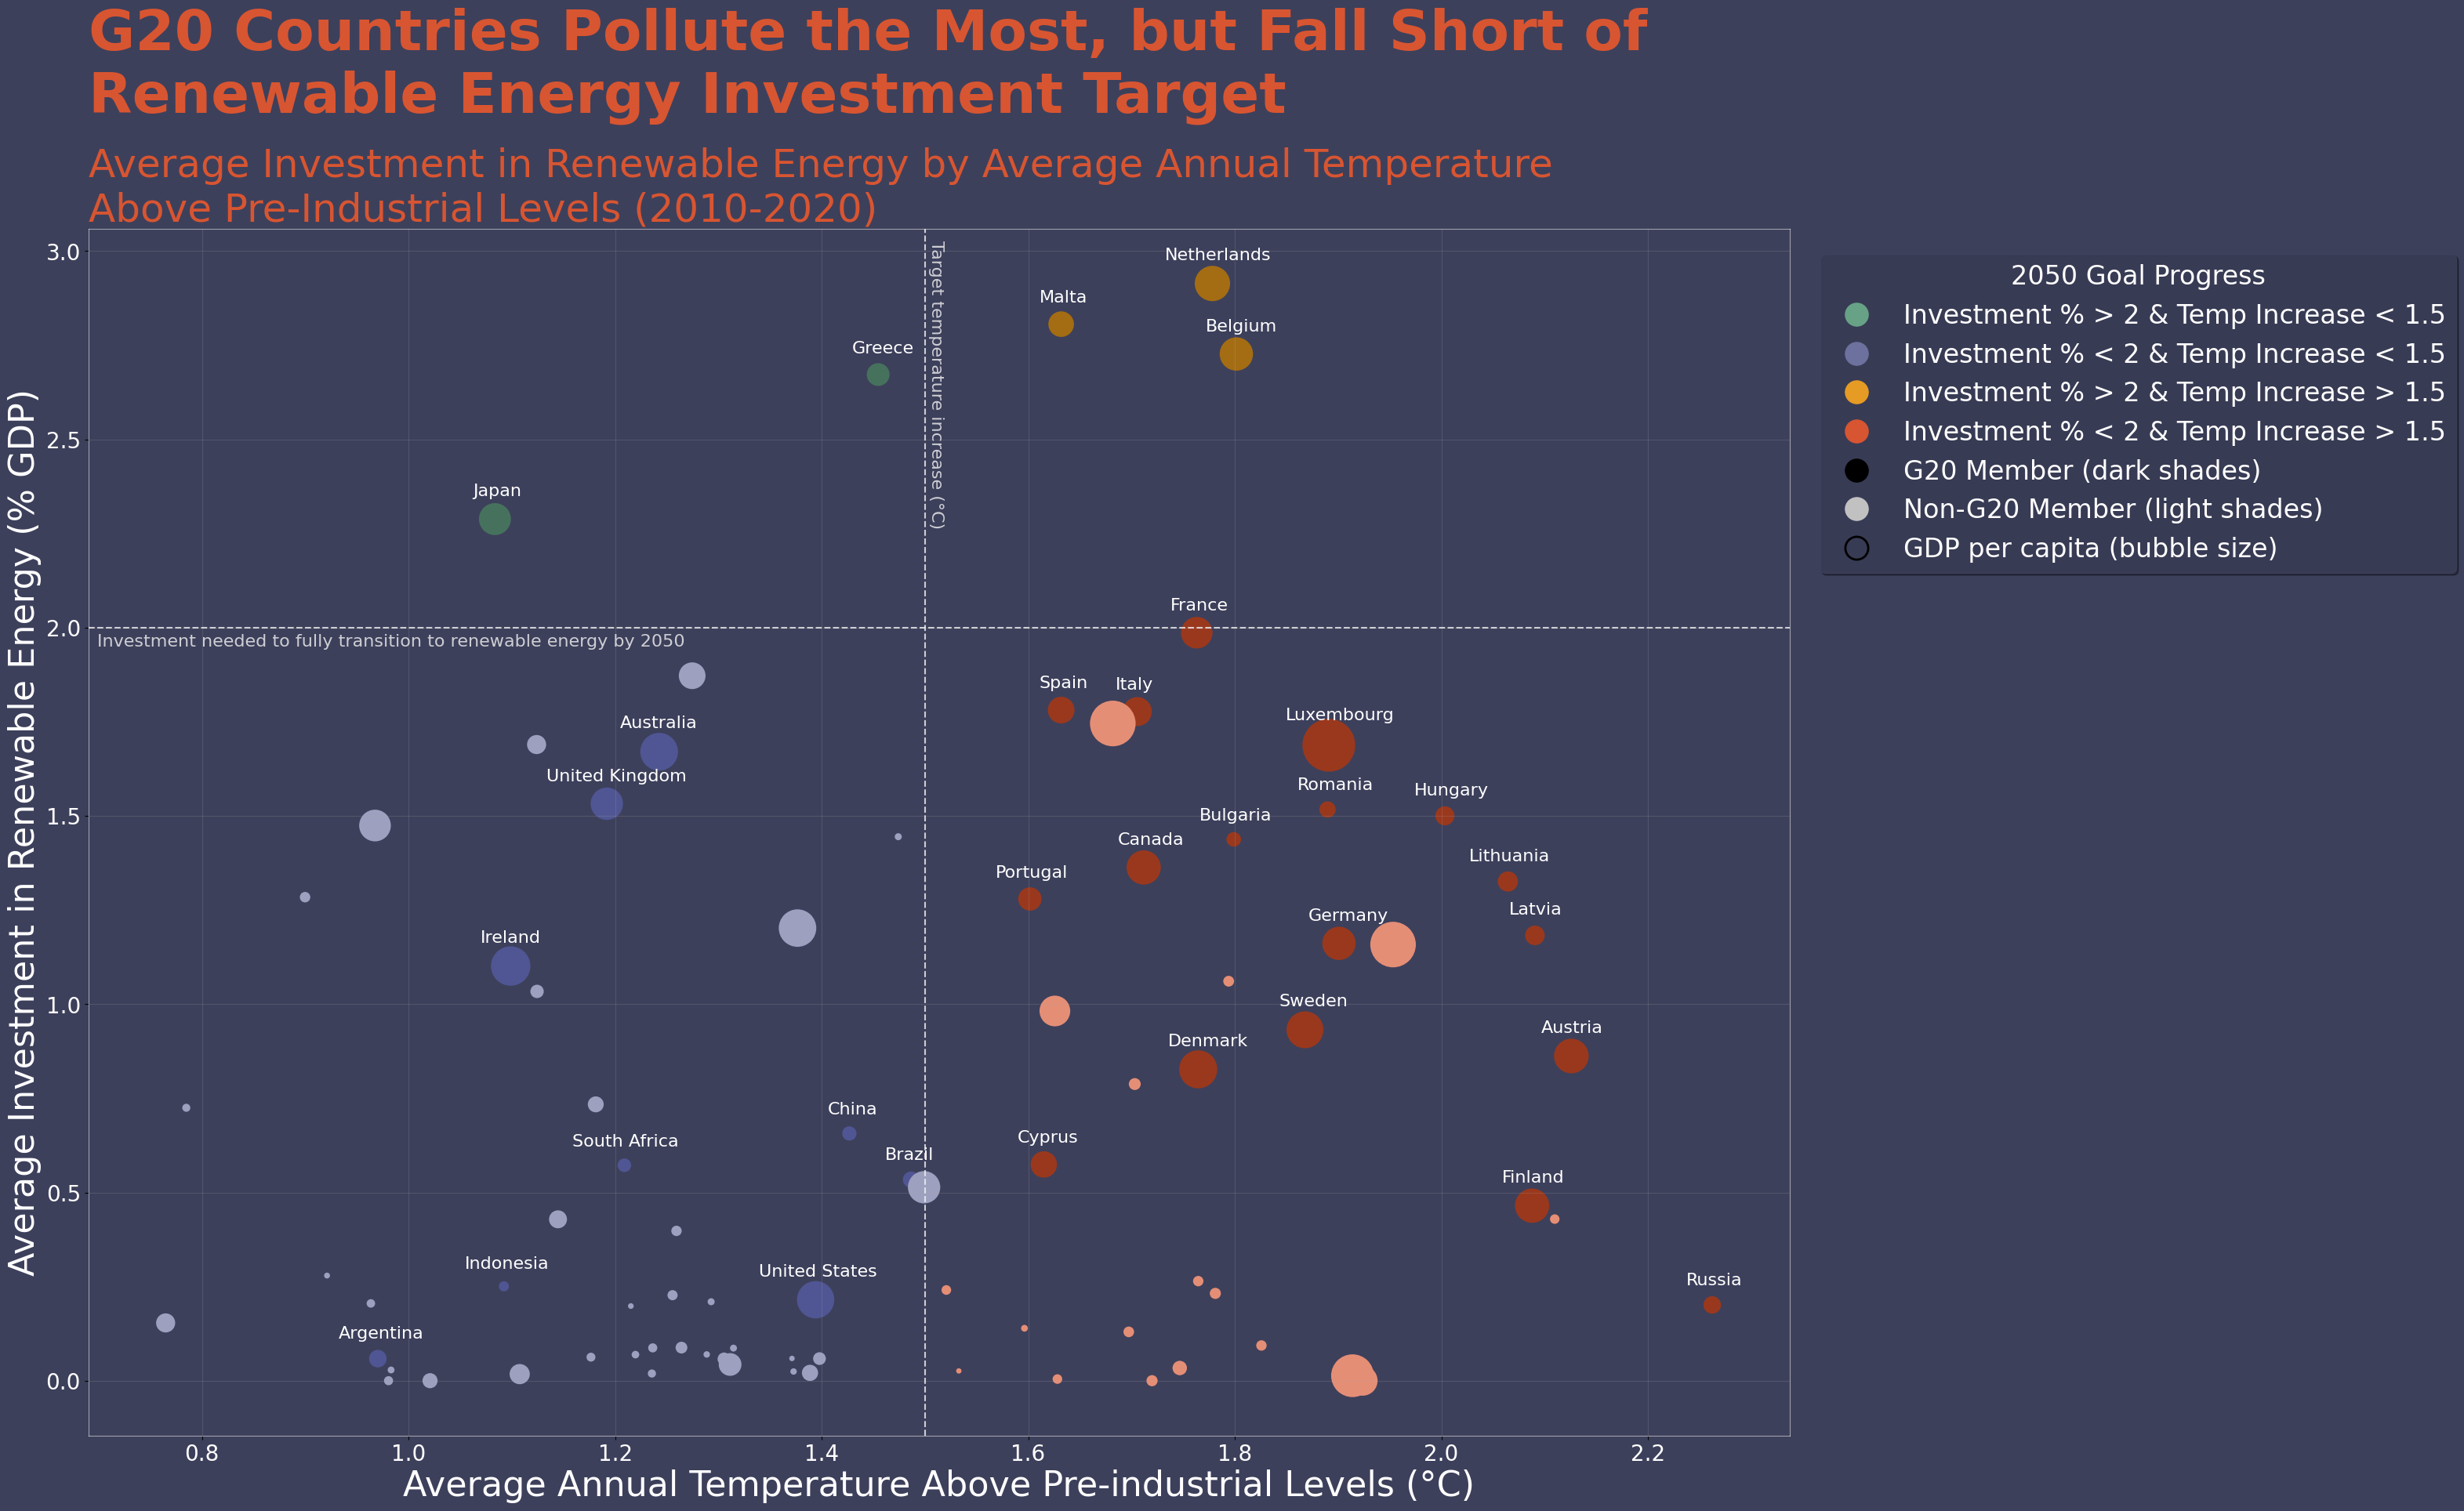

In [480]:
# plot with dark background

fig, ax = plt.subplots(1, figsize=(28, 20))
fig.set_facecolor('#3d405b')
ax.set_facecolor('#3d405b')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_alpha(0.5)
ax.spines['top'].set_alpha(0.5)
ax.spines['right'].set_alpha(0.5)
ax.spines['left'].set_alpha(0.5)


iiplot_data = invest_vs_impact2
iiplot_data['invest_impact'] = pd.Categorical(iiplot_data['invest_impact'], categories=['darkgreen', 'darkblue', 'darkorange', 'darkred', 'lightgreen', 'lightblue', 'lightorange', 'lightred'])
#iiplot_data['invest_impact'] = pd.Categorical(iiplot_data['invest_impact'], categories=['Dark Green', 'Dark Blue', 'Dark Orange', 'Dark Red', 'Light Green', 'Light Blue', 'Light Orange', 'Light Red'])
iiplot_data['g20'] = iiplot_data['g20'].replace({True: 'Yes', False: 'No'})


green_hex = '#67A286'
blue_hex = '#6C719D'
orange_hex = '#E59B24'
red_hex = '#D85531'
lightgreen_hex = '#9AC1AE'
lightblue_hex = '#9DA0BE'
lightorange_hex = '#EEBC6D'
lightred_hex = '#E58E76'
darkgreen_hex = '#46725D'
darkblue_hex = '#505693'
darkorange_hex = '#A46D13'
darkred_hex = '#9A381D'

sns.scatterplot(data=iiplot_data, x='temp_delta_avg', y='renew_invest_avg', hue='invest_impact', markers=True, linewidth = 0, legend = 'full', palette = dict(darkgreen = darkgreen_hex, darkblue = darkblue_hex, darkorange = darkorange_hex, darkred = darkred_hex, lightgreen = lightgreen_hex, lightblue = lightblue_hex, lightorange = lightorange_hex, lightred = lightred_hex), size='gdp_per_capita_avg', sizes=((iiplot_data['gdp_per_capita_avg'].min() ** (1/2)), (iiplot_data['gdp_per_capita_avg'].max() ** (2/3))))

'''
light green for investment % > 2 & temp increase < 1.5 (top-left quadrant). G20 -> darker green

light blue for for investment % > 2 & temp increase > 1.5 (top-right quadrant). G20 -> darker blue

light orange for investment % < 2 & temp increase < 1.5 (bottom-left quadrant). G20 -> darker orange

light red for investment % < 2 & temp increase > 1.5 (bottom-right quadrant). G20 -> darker red
'''

green_legend = mlines.Line2D([], [], color=green_hex, marker='o', linestyle='None', markersize=35)
blue_legend = mlines.Line2D([], [], color=blue_hex, marker='o', linestyle='None', markersize=35)
orange_legend = mlines.Line2D([], [], color=orange_hex, marker='o', linestyle='None', markersize=35)
red_legend = mlines.Line2D([], [], color=red_hex, marker='o', linestyle='None', markersize=35)
dark_legend = mlines.Line2D([], [], color='Black', marker='o', linestyle='None', markersize=35)
light_legend = mlines.Line2D([], [], color='#C1C1C2', marker='o', linestyle='None', markersize=35)
gdp_legend = mlines.Line2D([], [], color='White', marker='o', linestyle='None', markersize=35, markerfacecolor='None', markeredgecolor='Black', markeredgewidth=2)


labels = ['Investment % > 2 & Temp Increase < 1.5', 'Investment % < 2 & Temp Increase < 1.5', 'Investment % > 2 & Temp Increase > 1.5', 'Investment % < 2 & Temp Increase > 1.5', 'G20 Member (dark shades)', 'Non-G20 Member (light shades)', 'GDP per capita (bubble size)']
handles = [green_legend, blue_legend, orange_legend, red_legend, dark_legend, light_legend, gdp_legend]
# move legend outside of plot, and make labels and title white
legend = plt.legend(handles=handles, labels = labels, loc='upper left', title='2050 Goal Progress', markerscale=0.6, fontsize=24, title_fontsize=24, facecolor='#3d405b', edgecolor='#3d405b', framealpha=0.8, bbox_to_anchor=(1.01, 0.99), labelcolor='white', frameon=True, fancybox=True, shadow=True)

plt.setp(legend.get_title(), color='white')

plt.grid(alpha=0.18)

plt.axvline(x = 1.5, color = '#F2F2F2', linestyle = '--', alpha=0.8)
plt.annotate(f'Target temperature increase ({chr(176)}C)', (1.503, 2.27), color = '#F2F2F2', alpha=0.8, rotation=270, fontsize=16)

plt.axhline(y = 2, color = '#F2F2F2', linestyle = '--', alpha=0.8)
plt.annotate('Investment needed to fully transition to renewable energy by 2050', (0.6982, 1.95), color = '#F2F2F2', alpha=0.8, fontsize=16)

for i, txt in enumerate(invest_vs_impact2.index):
    if invest_vs_impact2['g20'][i] == 'Yes':
        plt.annotate(txt, (invest_vs_impact2['temp_delta_avg'][i] - (0.0042 * len(txt)), invest_vs_impact2['renew_invest_avg'][i] + (0.0057 * np.log(iiplot_data.iloc[i]['gdp_per_capita_avg']))), fontsize=16, color='white')
    else:
        continue

plt.suptitle('G20 Countries Pollute the Most, but Fall Short of \nRenewable Energy Investment Target', weight='bold', fontsize=52, y=1.021, x=0.125, ha='left', color = '#D85531')
plt.title('Average Investment in Renewable Energy by Average Annual Temperature \nAbove Pre-Industrial Levels (2010-2020)', weight=1.4, fontsize=36, loc= 'left', color = '#D85531')
plt.xlabel(f'Average Annual Temperature Above Pre-industrial Levels ({chr(176)}C)', fontsize=32, color='white')
plt.ylabel('Average Investment in Renewable Energy (% GDP)', fontsize=32, color = 'white')
plt.xticks(fontsize=20, color = 'white')
plt.yticks(fontsize=20, color = 'white')

plt.savefig('PosterSubmission_darkcolorquad.svg', format='svg', bbox_inches='tight')
plt.show()

## Global CO2 Emissions Plot

In [ ]:
energy['global_co2_delta'] = round((energy['global_co2_emissions'] / energy['global_co2_emissions'].shift(1) - 1) * 100, 1)

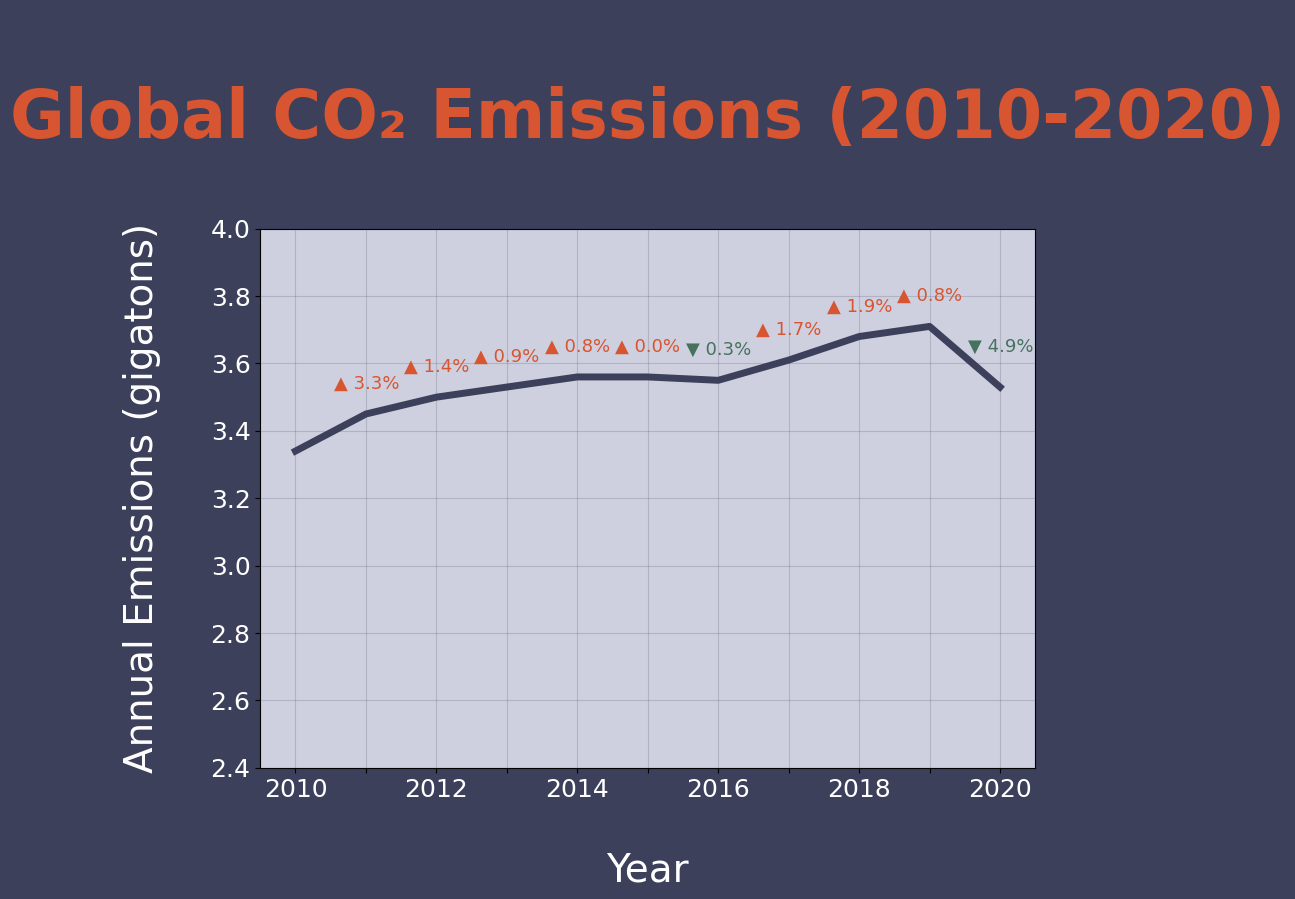

In [485]:
fig, ax = plt.subplots(1, figsize=(10, 7))
fig.set_facecolor('#3d405b')
ax.set_facecolor('#ced0df')

plt.plot(energy.index, energy.global_co2_emissions, color='#3d405b', linewidth=5)

up = u'\u25B2'
down = u'\u25BC'
for emit in zip(energy.index, energy.global_co2_emissions, energy.global_co2_delta): 
    if emit[2] >= 0: 
        plt.annotate(f'{up} {abs(emit[2])}%', (emit[0] - .46, emit[1] + 0.075), color='#D85531', weight=1, fontsize=13)
    if (emit[2] < 0) & (emit[2] > -3): 
        plt.annotate(f'{down} {abs(emit[2])}%', (emit[0] - .46, emit[1] + 0.075), color=darkgreen_hex, weight=1, fontsize=13)
    elif emit[2] < -3: 
        plt.annotate(f'{down} {abs(emit[2])}%', (emit[0] - .46, emit[1] + 0.105), color=darkgreen_hex, weight=1, fontsize=13)


twosub = u'\u2082'
plt.title(f'\nGlobal CO{twosub} Emissions (2010-2020)\n', fontsize=48, color='#D85531', weight='bold')
plt.xlabel('\nYear', fontsize=28, color='white')
plt.grid(color='#3d405b', alpha=0.2)
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], labels=[2010, '', 2012, '', 2014, '', 2016, '', 2018, '', 2020], fontsize=18, color='white')
plt.yticks(fontsize=18, color='white')
plt.ylabel(f'Annual Emissions (gigatons)\n', fontsize=28, color='white')
plt.ylim(2.4, 4)
plt.savefig('GlobalGreenhouseGasEmissions_20230122.svg', format='svg', bbox_inches='tight')
plt.show()

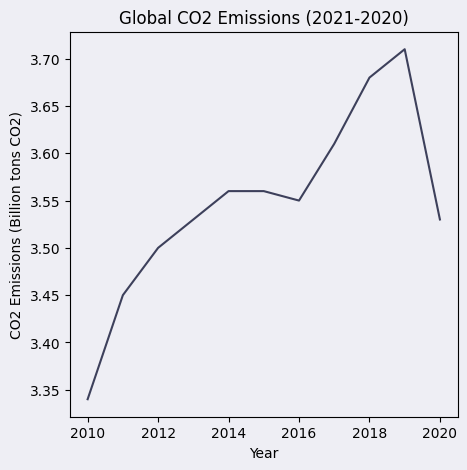

In [244]:
fig, ax = plt.subplots(1, figsize=(5, 5))
fig.set_facecolor('#eeeef4')
ax.set_facecolor('#eeeef4')

plt.plot(energy.global_co2_emissions, color='#3d405b')
plt.title('Global CO2 Emissions (2010-2020)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Billion tons CO2)')
plt.savefig('GlobalGreenhouseGasEmissions_20230122.svg', format='svg')
plt.show()